In [129]:
import numpy as np
import pandas as ps
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [130]:
#Read from the dataset
df=ps.read_csv('news.csv')
df.shape
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [131]:
#Check the labels
factcheck=df.label
factcheck.head(7)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
Name: label, dtype: object

In [132]:
#Split the dataset
a_train,a_test,b_train,b_test=train_test_split(df['text'],factcheck, test_size=0.15, random_state=8)

- 将TF-IDF Vectorizer初始化。设置英文停止词，并指定最大文档频率为0.65。这表示包含较高文档频率的术语将被删除。

- 过滤出停止词来进行自然语言处理。TF-IDF Vectorizer用于将一组原始文档转换为具有TF-IDF特性的矩阵。随机状态用于指定随机生成的种子，它确保了分割测试集训练集总是确定的。

- 使用矢量化工具来适应并转换你的训练集和测试集。用.fit_transform学习词汇表和逆文档频率。作为响应，它会创建term-document矩阵。使用.transform可返回一个term-document矩阵。运行以下代码：

In [133]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.65)
tfidf_train=tfidf_vectorizer.fit_transform(a_train)
tfidf_test=tfidf_vectorizer.transform(a_test)

- 现在将被动攻击算法初始化，将它安装在tfidf_train和b_train上。TF-IDF Vectorizer将有助于对测试集进行预测，并用sklearn.metrics中的 accuracy score()函数进行事实核查。

- 在多标签分类中，accuracy score()函数可以用来处理子集的准确率。一个样本中预测的标签必须与另一子集中相应的标签完全匹配。运行以下代码：

Fact-checkAccuracy Is 94.11%


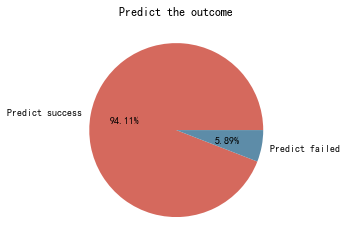

In [134]:
pclass=PassiveAggressiveClassifier(max_iter=60)
pclass.fit(tfidf_train,b_train)
b_pred=pclass.predict(tfidf_test)
factcheckscore=accuracy_score(b_test,b_pred)
print(f'Fact-checkAccuracy Is {round(factcheckscore*100,2)}%')

y = np.array([round(factcheckscore*100,2),100-round(factcheckscore*100,2)])
fig = plt.figure()
# 设置背景色
rect = fig.patch
rect.set_facecolor('white')
plt.pie(y,
        labels=['Predict success','Predict failed'],
        colors=["#d5695d", "#5d8ca8"],
        autopct='%.2f%%',
       )
plt.title("Predict the outcome")
plt.show()


### 混淆矩阵（Confusion matrix）

在机器学习分类中，如果输出应该生成两个或两个以上的类，则用于性能度量。有四种可能的结果：

- 真阳性 (True Positive) - 本身是对的，你当成对的了

- 假阳性 (False Positive) - 本身是错的，你当成对的了

- 真阴性 (True Negative) - 本身是错的，你当成错的了

- 假阴性 (False Negative) - 本身是对的，你当成错的了

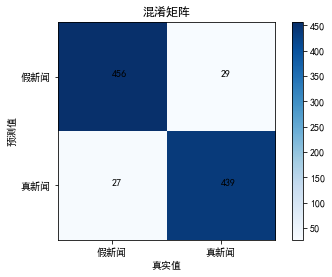

In [135]:
confusion = confusion_matrix(b_test,b_pred,labels=['FAKE','REAL'])
# 热度图，后面是指定的颜色块，可设置其他的不同颜色
plt.imshow(confusion, cmap=plt.cm.Blues)
# ticks 坐标轴的坐标点
# label 坐标轴标签说明
indices = range(len(confusion))
# 第一个是迭代对象，表示坐标的显示顺序，第二个参数是坐标轴显示列表
plt.xticks(indices, ['假新闻', '真新闻'])
plt.yticks(indices, ['假新闻', '真新闻'])

plt.colorbar()

plt.xlabel('真实值')
plt.ylabel('预测值')
plt.title('混淆矩阵')

# plt.rcParams两行是用于解决标签不能显示汉字的问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 显示数据
for first_index in range(len(confusion)):    #第几行
    for second_index in range(len(confusion[first_index])):    #第几列
        plt.text(first_index, second_index, confusion[first_index][second_index])
# 在matlab里面可以对矩阵直接imagesc(confusion)
# 显示
plt.show()

----------------------
假阳率	真阳率	阈值
0.000000 0.000000 2.000000
0.061966 0.944099 1.000000
1.000000 1.000000 0.000000
----------------------


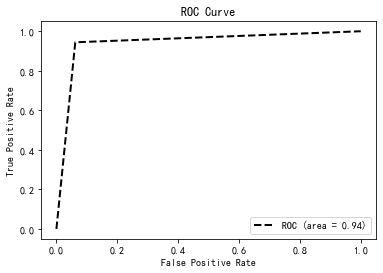

In [165]:
#绘制roc曲线
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

y_label = []
y_score = []

b_tt = pd.Series.tolist(b_test)
m = len(b_tt)
for i in range(m):
    if b_tt[i]=='FAKE':
        y_label.append(1)
    else:
        y_label.append(0)
    if b_pred[i]=='FAKE':
        y_score.append(1)
    else:
        y_score.append(0)

fpr, tpr, thersholds = roc_curve(y_label, y_score, pos_label=1)
print('----------------------')
print('假阳率\t真阳率\t阈值')
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))
print('----------------------')

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

